# **Load file csv**

In [1]:
# Mount the google drive to google colab
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
# Load the data in csv file stored in a pandas DataFrame
import pandas as pd
path = "/content/drive/MyDrive/Data Analyst Course/5.1 Introduction to Programming with Python/5.3 Capstone Project -  Introduction to Programming with Python/2019SalesMgd.csv"
df = pd.read_csv (path)

# Load if it is done
df.shape

(185652, 16)

In [3]:
df.columns

Index(['order id', 'product', 'quantity ordered', 'price each', 'order date',
       'street', 'city', 'state', 'postcode', 'month', 'weekday', 'hour',
       'hour_only', 'year', 'month_year', 'revenue'],
      dtype='object')

In [4]:
df

,order id,product,quantity ordered,price each,order date,street,city,state,postcode,month,weekday,hour,hour_only,year,month_year,revenue
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,917 1st St,Dallas TX,TX,75001,April,Friday,08:46,8,2019,April_2019,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,682 Chestnut St,Boston MA,MA,2215,April,Sunday,22:30,22,2019,April_2019,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,669 Spruce St,Los Angeles CA,CA,90001,April,Friday,14:38,14,2019,April_2019,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,669 Spruce St,Los Angeles CA,CA,90001,April,Friday,14:38,14,2019,April_2019,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,333 8th St,Los Angeles CA,CA,90001,April,Tuesday,09:27,9,2019,April_2019,11.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185647,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,840 Highland St,Los Angeles CA,CA,90001,September,Tuesday,20:56,20,2019,September_2019,8.97
185648,259354,iPhone,1,700.00,2019-09-01 16:00:00,216 Dogwood St,San Francisco CA,CA,94016,September,Sunday,16:00,16,2019,September_2019,700.00
185649,259355,iPhone,1,700.00,2019-09-23 07:39:00,220 12th St,San Francisco CA,CA,94016,September,Monday,07:39,7,2019,September_2019,700.00
185650,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,511 Forest St,San Francisco CA,CA,94016,September,Thursday,17:30,17,2019,September_2019,379.99


# **Import the requested libraries**

In [5]:
# importing the Facebook Prophet library for time series forecasting
from prophet import Prophet

In [6]:
# Importing the library to creat visual representations of data
import matplotlib.pyplot as plt

In [7]:
# Impoting the sns library to create statistical graphics
import seaborn as sns

In [8]:
# Importing numpy to suport large arrays and matrices
import numpy as np

In [9]:
# Importing ARIMA to time series forecasting and analysis
from statsmodels.tsa.arima.model import ARIMA

In [10]:
# Importing sm  to perform hypothesis tests, and conducting statistical data exploration
import statsmodels.api as sm

# **Question 1**
### What is the best month for sales in each city?

In [11]:
# Calculate the total sales for each city and month
city_month_sales = df.groupby(['city', 'month'])['revenue'].sum()

# Reset the multi-level index to get a DataFrame with City, Month, and Total Sales columns
city_month_sales_df = city_month_sales.reset_index()

# Find the best month for sales in each city
best_month_sales = city_month_sales_df.loc[city_month_sales_df.groupby('city')['revenue'].idxmax()]

# Print the result
print(best_month_sales)

                 city     month     revenue
2          Atlanta GA  December   360494.32
14          Austin TX  December   233315.10
26          Boston MA  December   509480.38
38          Dallas TX  December   380706.86
50     Los Angeles CA  December   682740.98
62   New York City NY  December   646508.85
80        Portland ME       May    57978.76
86        Portland OR  December   251495.06
98   San Francisco CA  December  1105582.13
110        Seattle WA  December   386005.95


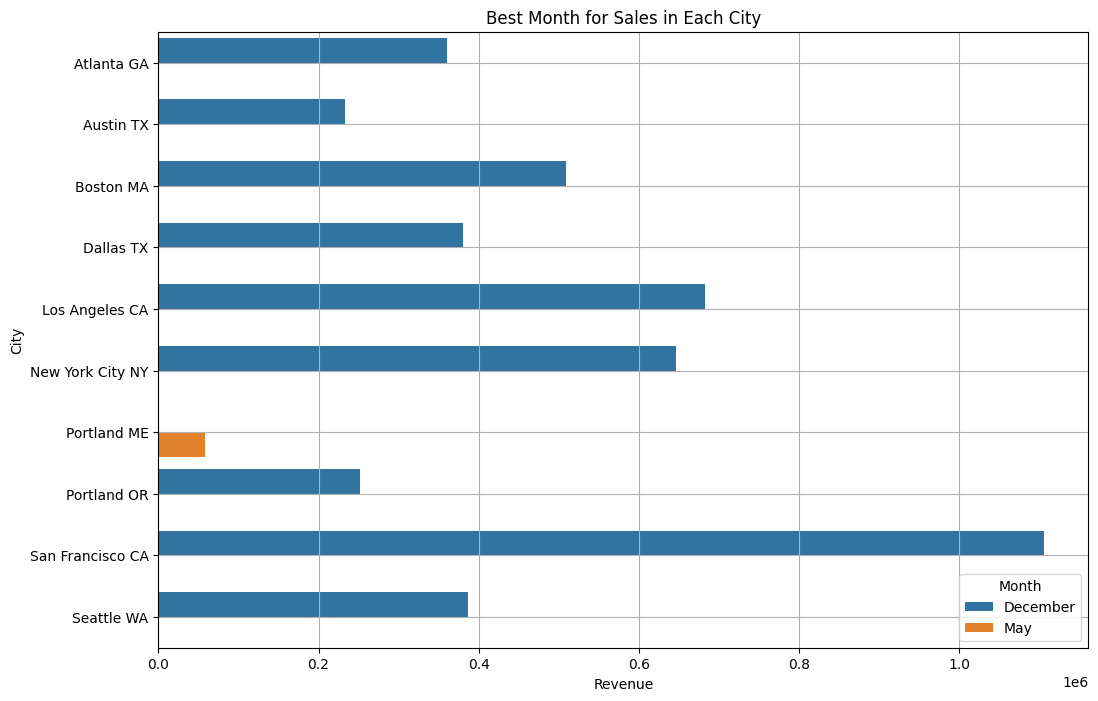

In [12]:
# Group by city and month, and calculate the sum of sales for each month in each city
city_month_sales = df.groupby(['city', 'month'])['revenue'].sum().reset_index()

# Find the best month for sales in each city
best_month_sales = city_month_sales.loc[city_month_sales.groupby('city')['revenue'].idxmax()]

# Create a bar chart showing the best month for sales in each city
plt.figure(figsize=(12, 8))
sns.barplot(x="revenue", y="city", hue="month", data=best_month_sales)
plt.title("Best Month for Sales in Each City")
plt.xlabel("Revenue")
plt.ylabel("City")
plt.legend(title='Month', loc='lower right')
plt.grid(True)
plt.show()

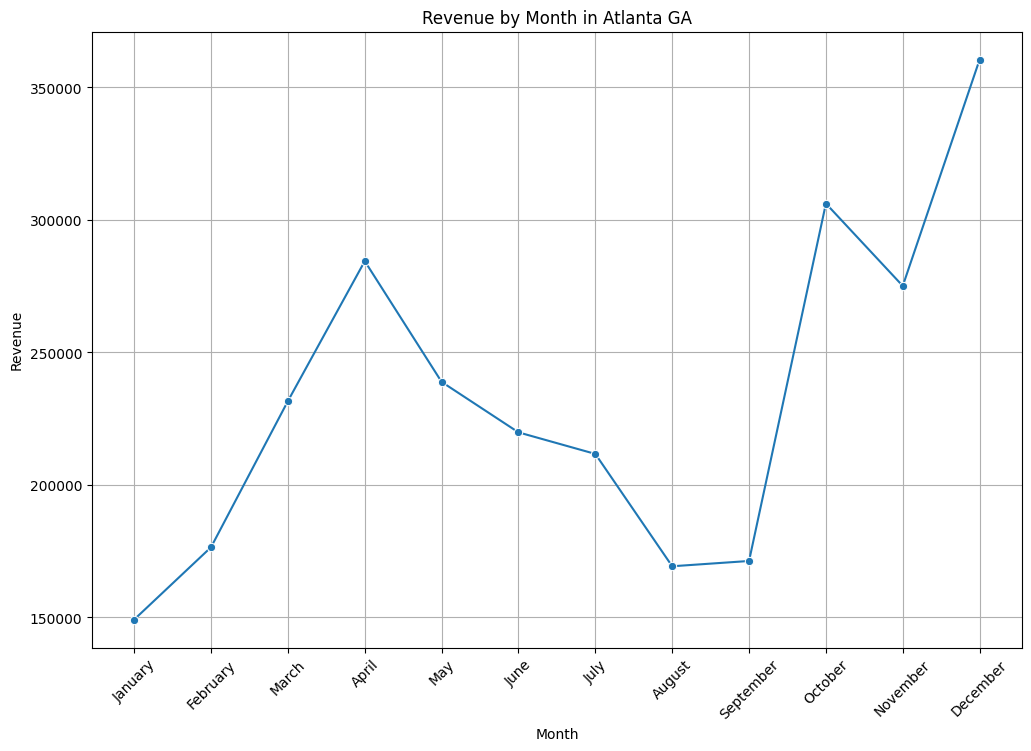

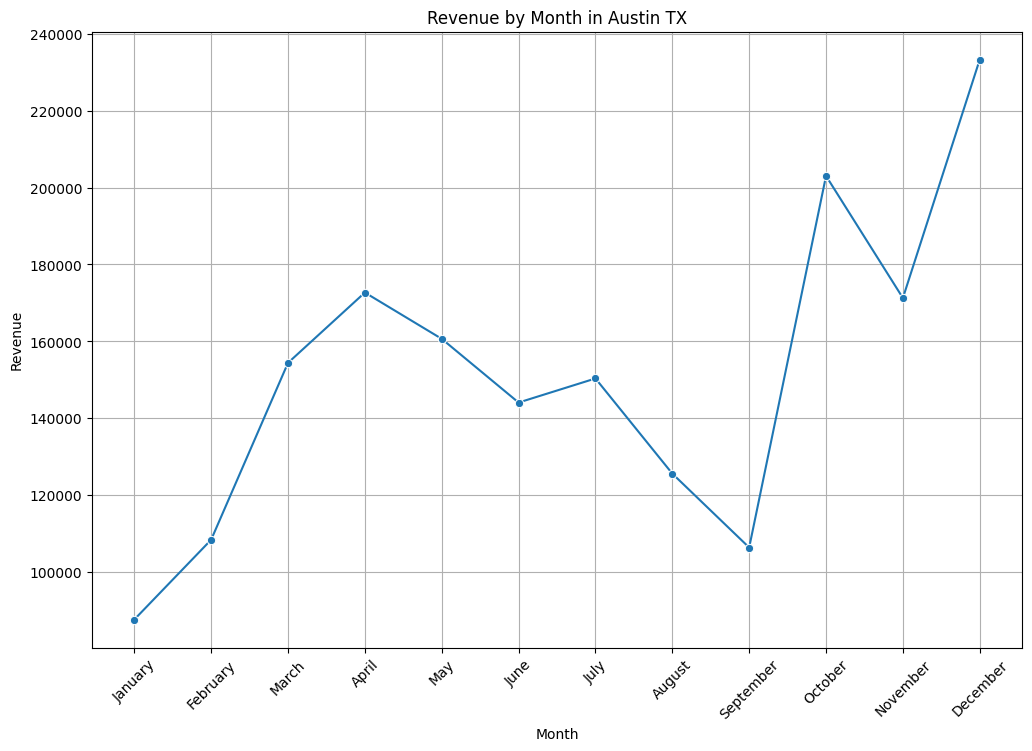

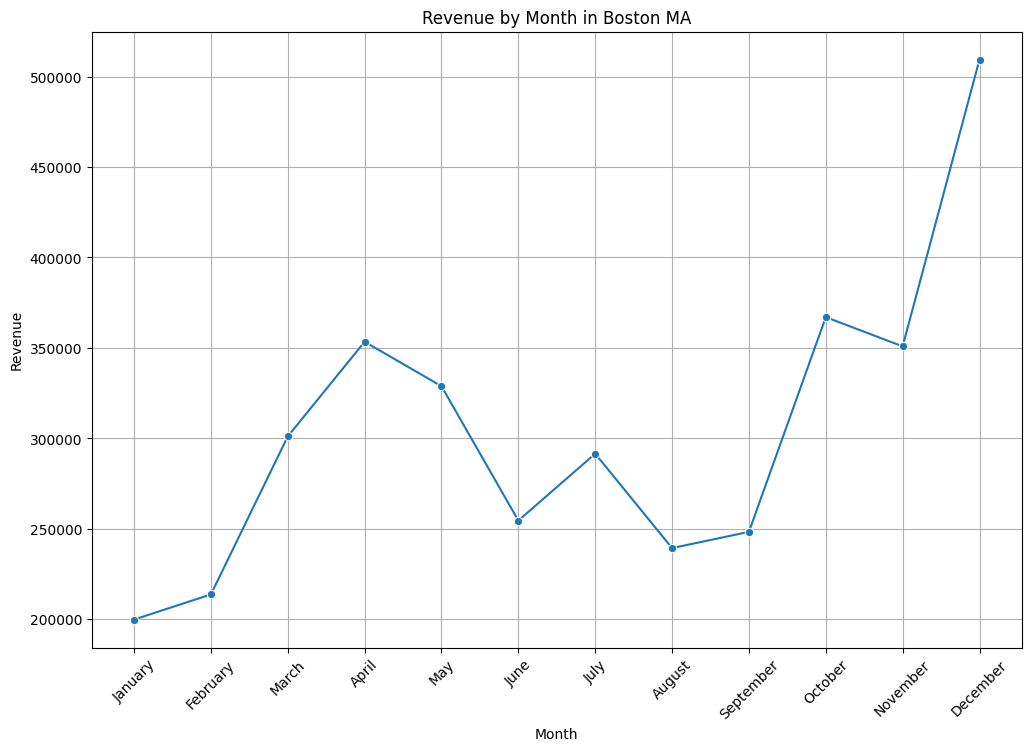

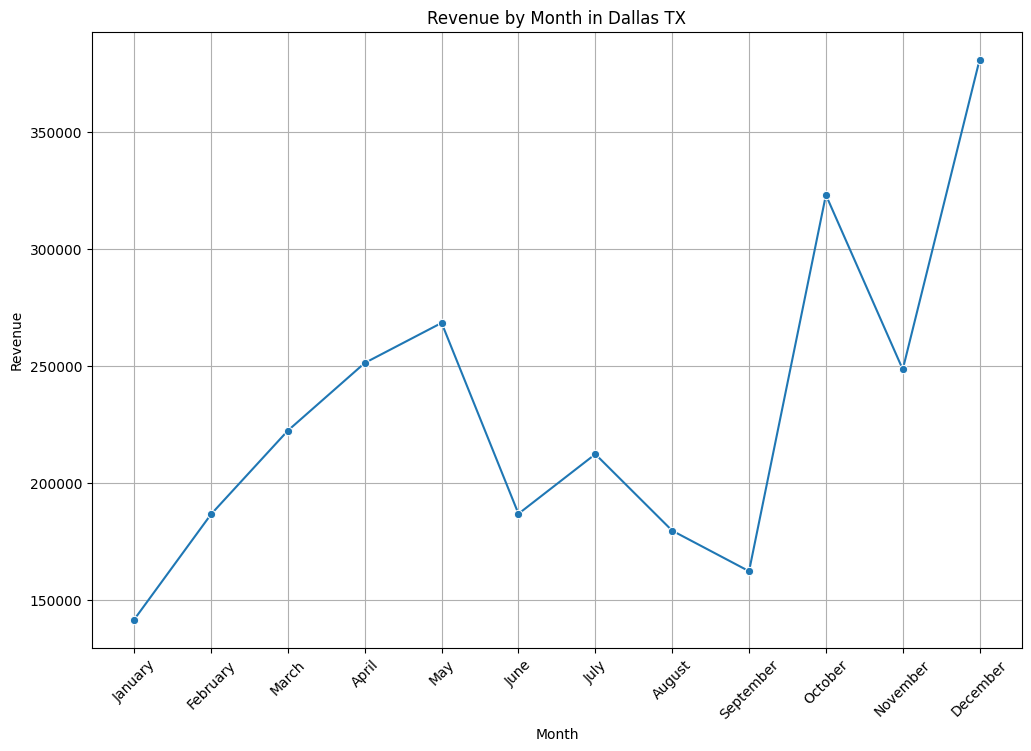

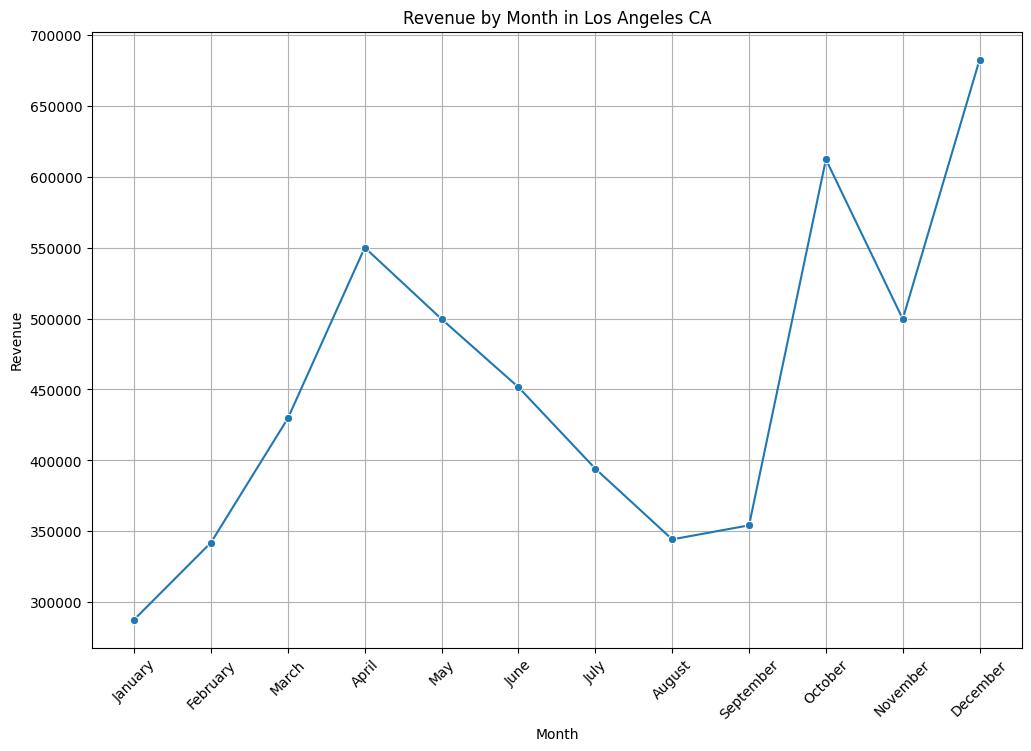

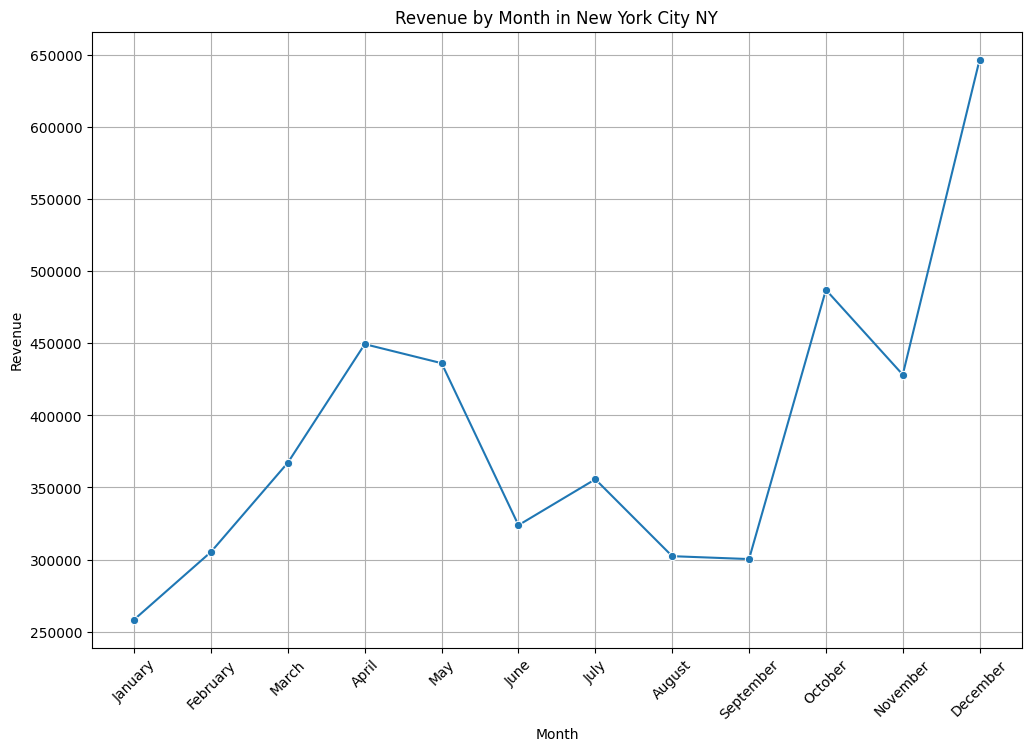

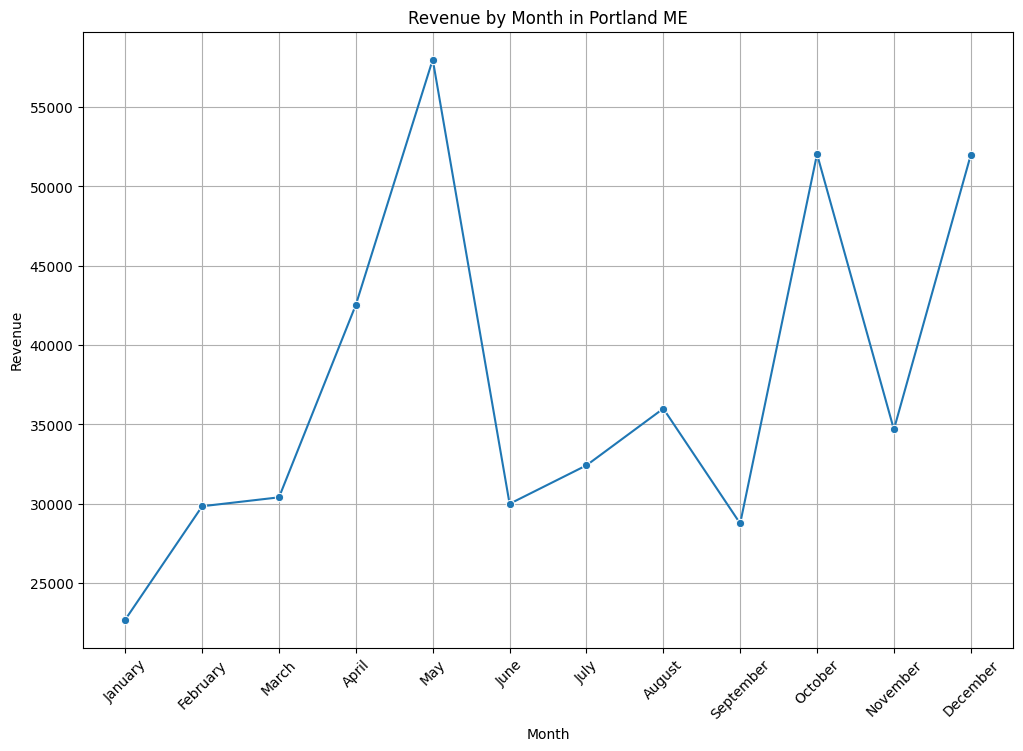

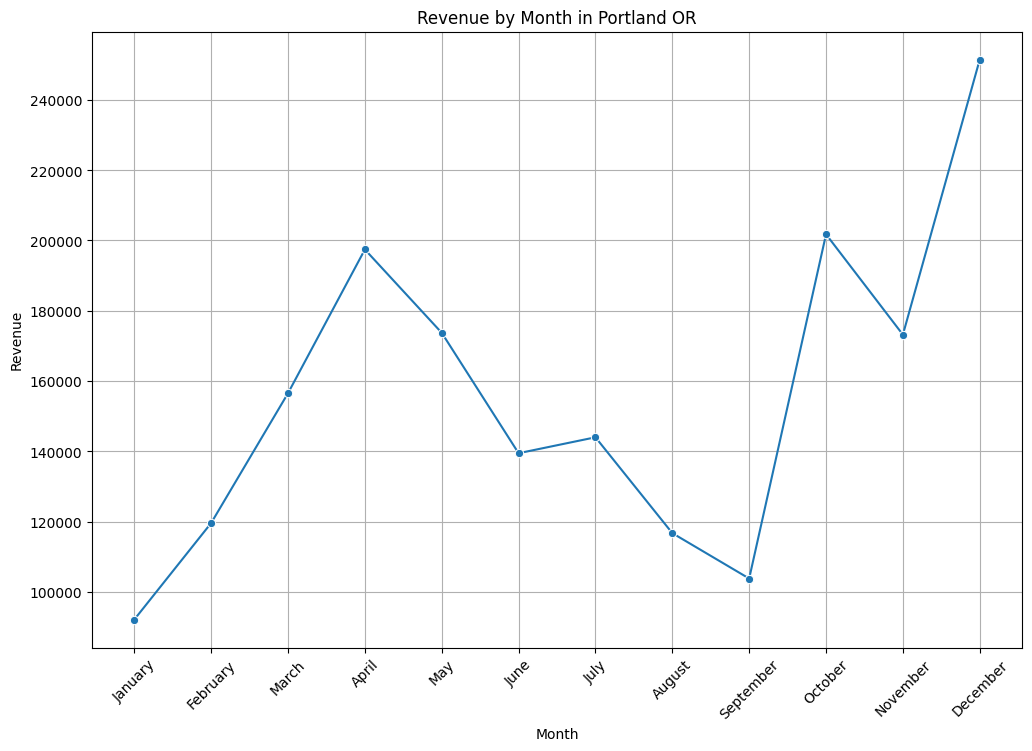

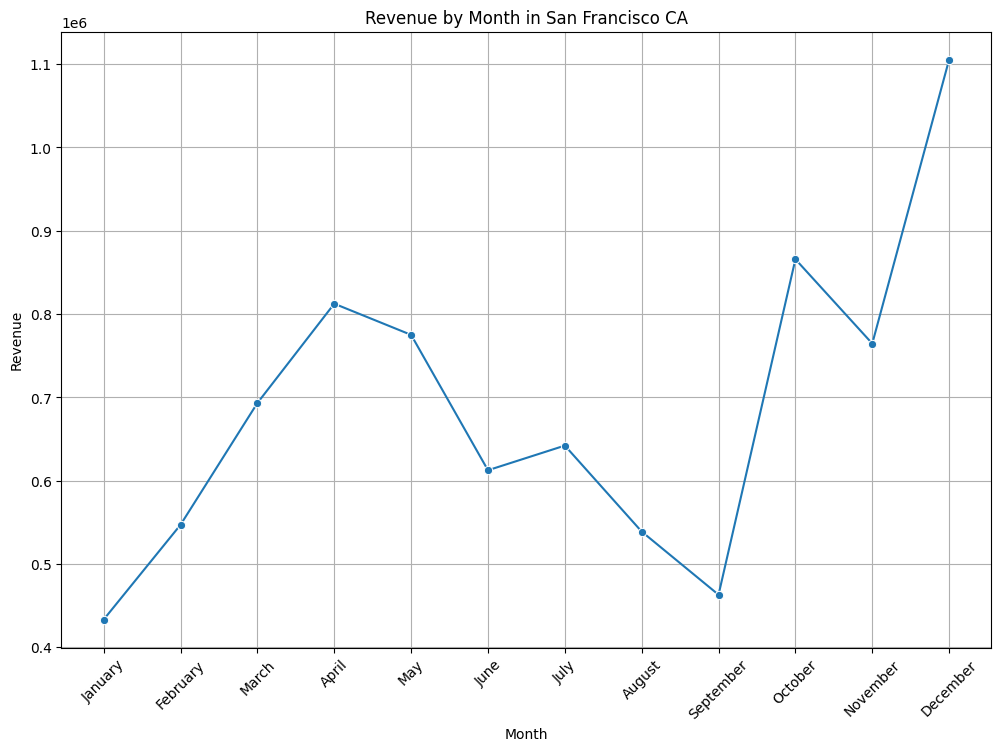

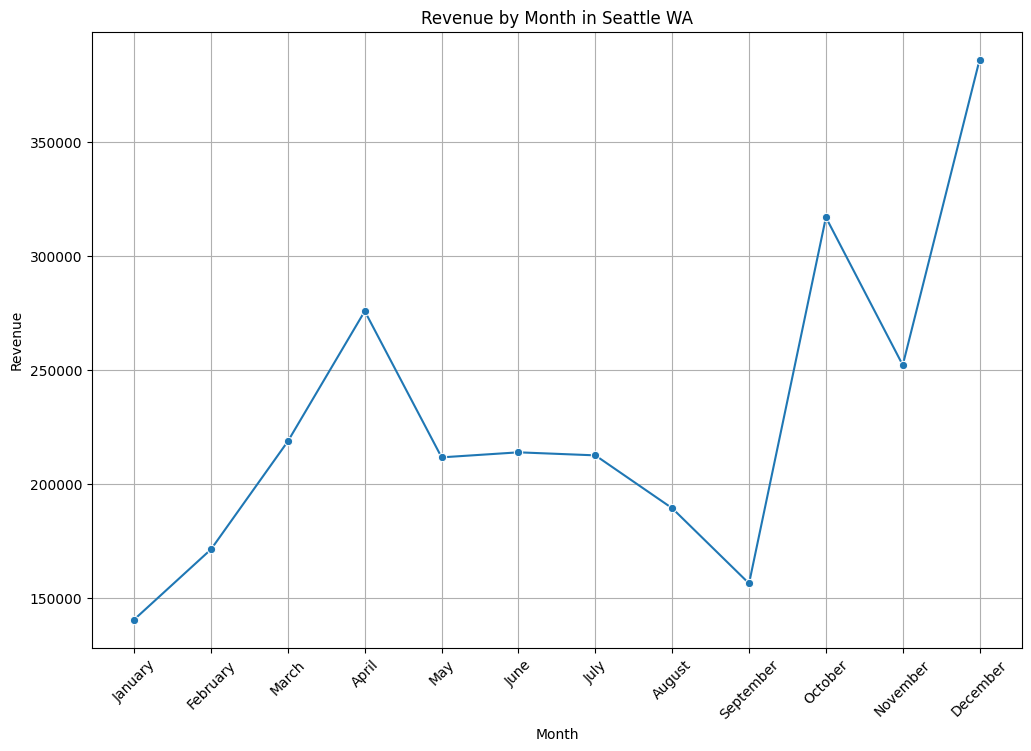

In [13]:
# Define the chronological order of the months
chronological_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'month' column to a categorical data type with the custom order
df['month'] = pd.Categorical(df['month'], categories=chronological_order, ordered=True)

# Group by city and month, and calculate the sum of sales for each month in each city
city_month_sales = df.groupby(['city', 'month'])['revenue'].sum().reset_index()

# Get the unique cities in the dataframe
unique_cities = city_month_sales['city'].unique()

# Loop through each city and create separate plots
for city in unique_cities:
    # Filter data for the current city
    city_data = city_month_sales[city_month_sales['city'] == city]

    # Create a line plot for the current city
    plt.figure(figsize=(12, 8))
    sns.lineplot(x='month', y='revenue', data=city_data, marker='o')
    plt.title(f"Revenue by Month in {city}")
    plt.xlabel("Month")
    plt.ylabel("Revenue")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# **Question 2**
### What is the predicted revenue of the next 3 months for each region?

##### **Step1 - Revenue 2019 by State**

In [14]:
# Calculate the total sales for each state for each month in 2019
RevenueMonthlyState = df[df['month_year'].str.contains('2019')].groupby(['state', 'month_year'])['revenue'].sum()
# Reset the multi-level index to get a DataFrame with State, Month_year, and Total Sales columns
RevenueMonthlySate_df = RevenueMonthlyState.reset_index()

# Change the format of the month_year column to "January 2019" format
RevenueMonthlySate_df['month_year'] = pd.to_datetime(RevenueMonthlySate_df['month_year'], format='%B_%Y').dt.strftime('%B %Y')

# Pivot the state_month_sales_2019_df DataFrame
MonthlySalesByState = RevenueMonthlySate_df.pivot(index='state', columns='month_year', values='revenue')
# Sort the DataFrame by the chronological order of months
MonthlySalesByState = MonthlySalesByState.reindex(sorted(MonthlySalesByState.columns, key=pd.to_datetime), axis=1)

# Print the results
print(MonthlySalesByState)

month_year  January 2019  February 2019  March 2019  April 2019    May 2019  \
state                                                                         
CA             720666.47      888850.28  1122715.72  1362467.59  1274553.77   
GA             149159.54      176458.31   231605.38   284422.01   238842.00   
MA             199730.86      213612.59   301023.81   353392.17   328791.70   
ME              22708.80       29845.49    30406.30    42536.49    57978.76   
NY             258488.72      305372.26   367226.31   449314.88   436120.42   
OR              92123.77      119594.38   156541.73   197441.63   173729.25   
TX             229322.65      295014.52   376765.28   423919.13   428961.83   
WA             140542.06      171330.25   218688.82   275724.08   211638.50   

month_year   June 2019   July 2019  August 2019  September 2019  October 2019  \
state                                                                           
CA          1063897.74  1036044.66    882878.89

##### **Step 2 - Forecasting by State**
###### Calculating the average growth rate for 2019 by considering the percentage change in sales from month to month and then takes the mean of these growth rate.

In [19]:
# Initialize a dictionary to store the forecasted sales for each state
forecast_data = {}

# Iterate over each state and calculate the forecasted sales
for state in MonthlySalesByState.index:
    state_sales_2019 = MonthlySalesByState.loc[state, :]

    # Calculate the average growth rate for each month in 2019
    growth_rates = state_sales_2019.pct_change()
    avg_growth_rate = growth_rates.mean()

    # Forecast sales for January 2020
    january_sales_2019 = state_sales_2019.iloc[0]  # January 2019 sales
    forecasted_january_sales = january_sales_2019 * (1 + avg_growth_rate)  # Forecast for January 2020

    # Forecast sales for February 2020
    february_sales_2019 = state_sales_2019.iloc[1]  # February 2019 sales
    forecasted_february_sales = february_sales_2019 * (1 + avg_growth_rate)  # Forecast for February 2020

    # Forecast sales for March 2020
    march_sales_2019 = state_sales_2019.iloc[2]  # March 2019 sales
    forecasted_march_sales = march_sales_2019 * (1 + avg_growth_rate)  # Forecast for March 2020

    # Store the forecasted sales in the dictionary
    forecast_data[state] = [forecasted_january_sales, forecasted_february_sales, forecasted_march_sales]

# Create a DataFrame from the forecast_data dictionary
forecast_df = pd.DataFrame.from_dict(forecast_data, orient='index', columns=['January 2020', 'February 2020', 'March 2020'])

# Print the result
print(forecast_df)





     January 2020  February 2020    March 2020
CA  806538.555625  994762.557772  1.256495e+06
GA  166173.860046  196586.544246  2.580241e+05
MA  222380.721491  237836.666221  3.351605e+05
ME   25963.093245   34122.509327  3.476369e+04
NY  288397.348203  340705.582815  4.097165e+05
OR  105002.422021  136313.348445  1.784258e+05
TX  260765.855756  335464.960693  4.284248e+05
WA  160959.482882  196220.465547  2.504591e+05


##### **Step 3 - Ploting 3 Month Forecast for each State**
###### (using the single average growth rate to forecast the sales for each state for the first three months of 2020)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/hpbg690t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/b4re827g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91546', 'data', 'file=/tmp/tmpyvo7pu0k/hpbg690t.json', 'init=/tmp/tmpyvo7pu0k/b4re827g.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_modele4adsww8/prophet_model-20230802130437.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:04:37 - cmdstanpy - INFO - Chain [1] start processing
IN

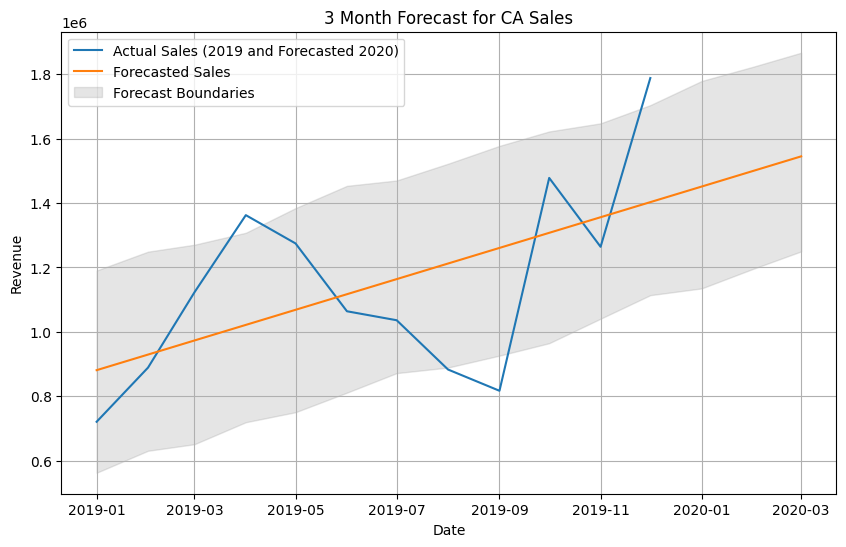

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/em5uih_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/_0150u7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95185', 'data', 'file=/tmp/tmpyvo7pu0k/em5uih_n.json', 'init=/tmp/tmpyvo7pu0k/_0150u7v.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_modelm59q3dla/prophet_model-20230802130437.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:04:37 - cmdstanpy - INFO - Chain [1] start processing
IN

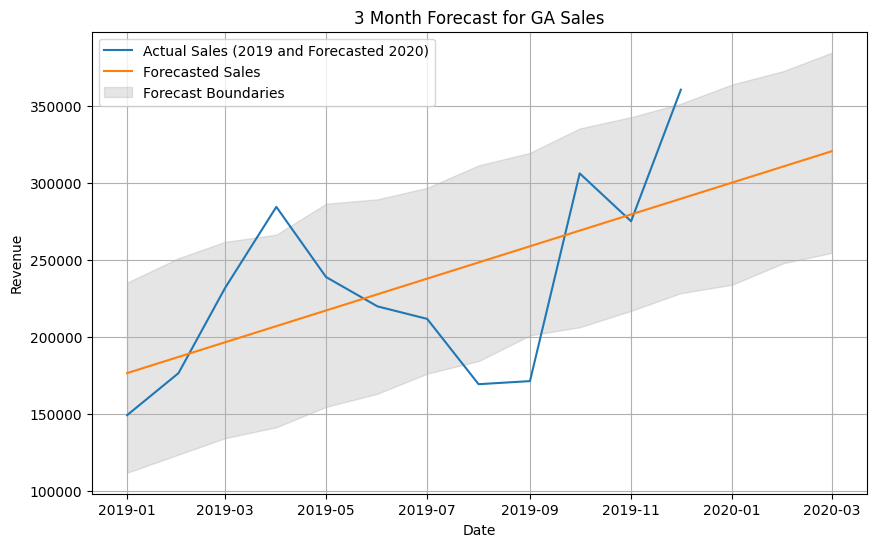

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/q6jnw25x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/el6dzhfh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76843', 'data', 'file=/tmp/tmpyvo7pu0k/q6jnw25x.json', 'init=/tmp/tmpyvo7pu0k/el6dzhfh.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_model0bbh_dk7/prophet_model-20230802130438.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:04:38 - cmdstanpy - INFO - Chain [1] start processing
IN

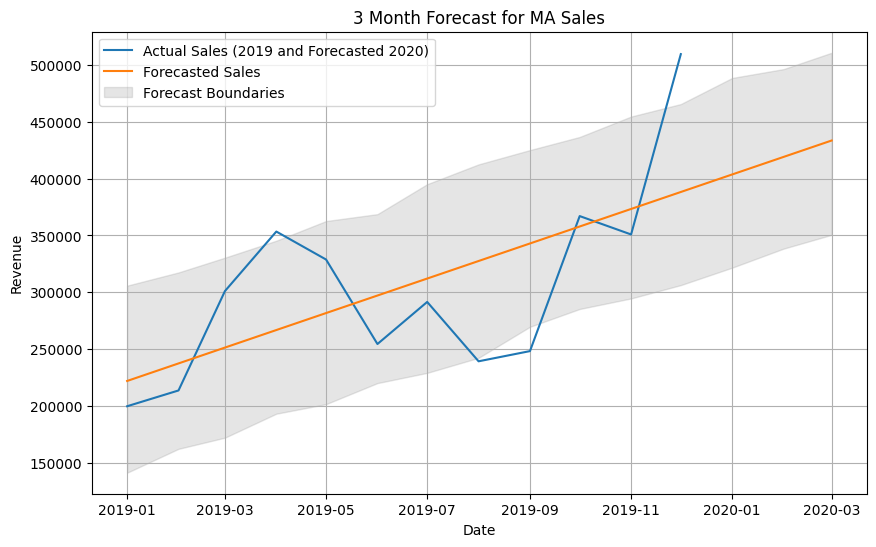

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/w3dmck5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/g36hg2q4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23847', 'data', 'file=/tmp/tmpyvo7pu0k/w3dmck5w.json', 'init=/tmp/tmpyvo7pu0k/g36hg2q4.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_modelaq1ztfhb/prophet_model-20230802130438.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:04:38 - cmdstanpy - INFO - Chain [1] start processing
IN

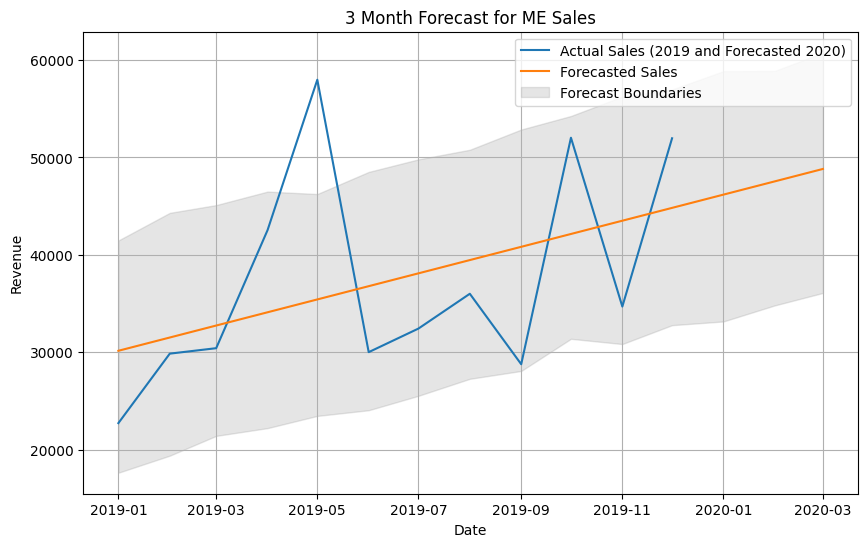

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/romo77fe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/m5oi4tq2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79402', 'data', 'file=/tmp/tmpyvo7pu0k/romo77fe.json', 'init=/tmp/tmpyvo7pu0k/m5oi4tq2.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_modelccbp_wnz/prophet_model-20230802130439.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:04:39 - cmdstanpy - INFO - Chain [1] start processing
IN

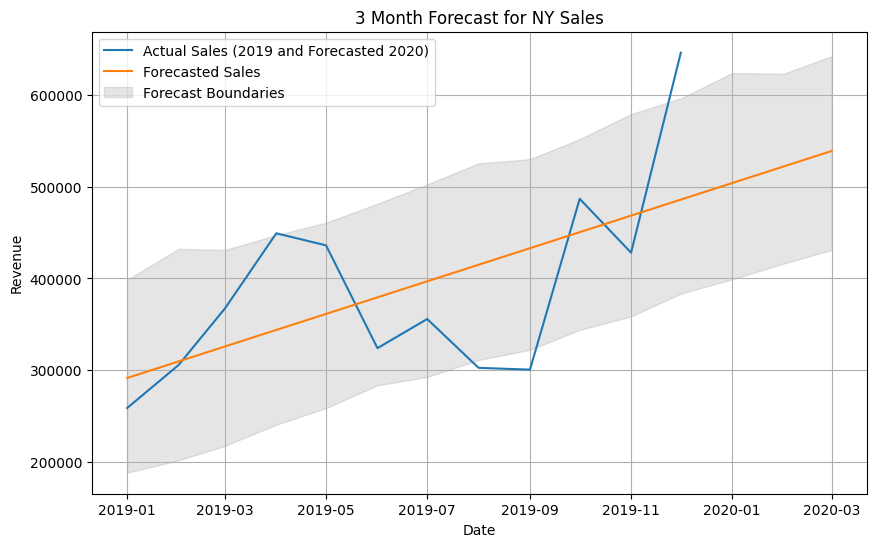

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/tr2ch18e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/7ufgrtp9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91397', 'data', 'file=/tmp/tmpyvo7pu0k/tr2ch18e.json', 'init=/tmp/tmpyvo7pu0k/7ufgrtp9.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_model6rde_m9p/prophet_model-20230802130439.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:04:39 - cmdstanpy - INFO - Chain [1] start processing
IN

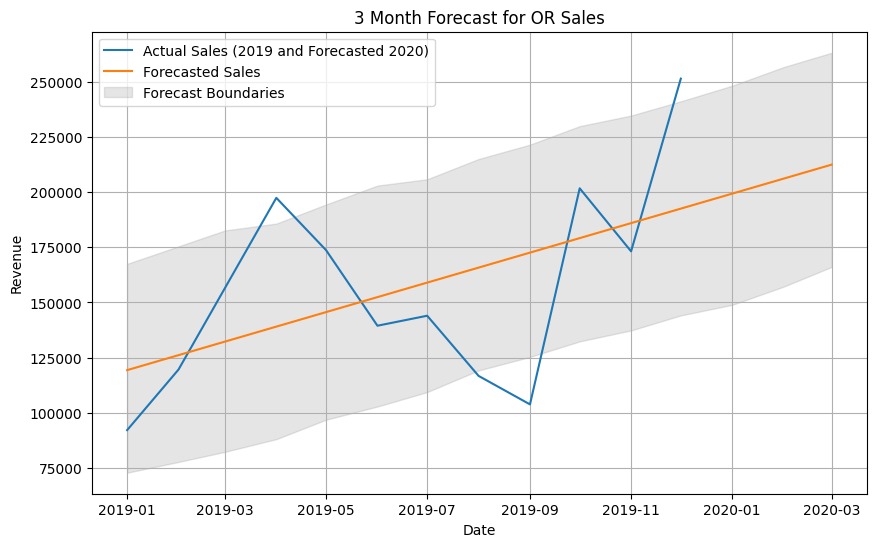

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/npgiuxxp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/bkbocosv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54312', 'data', 'file=/tmp/tmpyvo7pu0k/npgiuxxp.json', 'init=/tmp/tmpyvo7pu0k/bkbocosv.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_model1ittmx5k/prophet_model-20230802130440.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:04:40 - cmdstanpy - INFO - Chain [1] start processing
IN

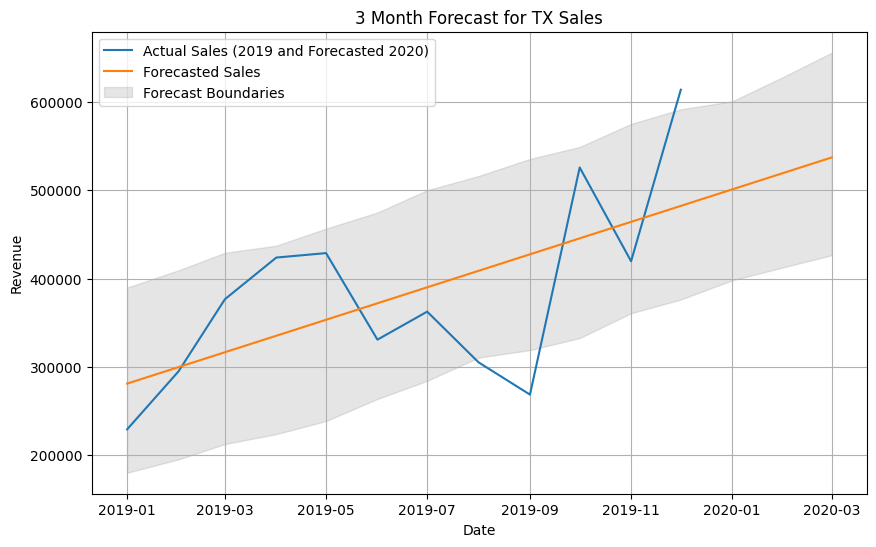

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/gf902mmz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/vwzgj3ve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13295', 'data', 'file=/tmp/tmpyvo7pu0k/gf902mmz.json', 'init=/tmp/tmpyvo7pu0k/vwzgj3ve.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_modely1e00zw_/prophet_model-20230802130441.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:04:41 - cmdstanpy - INFO - Chain [1] start processing
IN

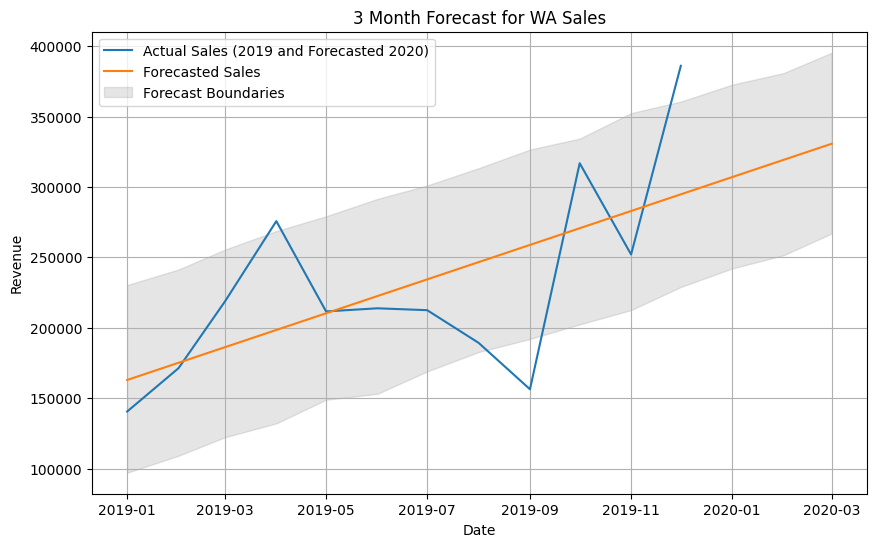

In [20]:
# Define a function to plot the forecast for each state
def plot_forecast(state):
    # Create a DataFrame containing the sales data for the specified state
    state_data = MonthlySalesByState.loc[state].reset_index()
    state_data.columns = ['ds', 'y']
    # Combine the 2019 sales data and the forecasted data for 2020 for the specified state
    state_data = pd.concat([state_data, forecast_df], ignore_index=True)

    # Drop any rows with missing (NaN) values in the 'y' column
    state_data.dropna(subset=['y'], inplace=True)
    # Convert the 'ds' column to datetime format
    state_data['ds'] = pd.to_datetime(state_data['ds'])

    # Create and fit the Prophet model
    model = Prophet()
    model.fit(state_data)
    # Make a forecast for the next 3 months (3 months in 2020 + 12 months in 2019)
    future = model.make_future_dataframe(periods=3, freq='MS')
    forecast = model.predict(future)

    # Plot the forecasted data
    plt.figure(figsize=(10, 6))
    plt.plot(state_data['ds'], state_data['y'], label='Actual Sales (2019 and Forecasted 2020)')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2, color='gray', label='Forecast Boundaries')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.title(f'3 Month Forecast for {state} Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function for each state to plot individual charts
for state in MonthlySalesByState.index:
    plot_forecast(state)


##### **Step 3 - Ploting 3 Month Forecast for each State**
###### (using the average growth rate for January, February, and March 2019 to forecast the sales for the same months in 2020, respectively)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/yc09rpeb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/zreozl4q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47170', 'data', 'file=/tmp/tmpyvo7pu0k/yc09rpeb.json', 'init=/tmp/tmpyvo7pu0k/zreozl4q.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_modelxjouat33/prophet_model-20230802130508.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:05:08 - cmdstanpy - INFO - Chain [1] start processing
IN

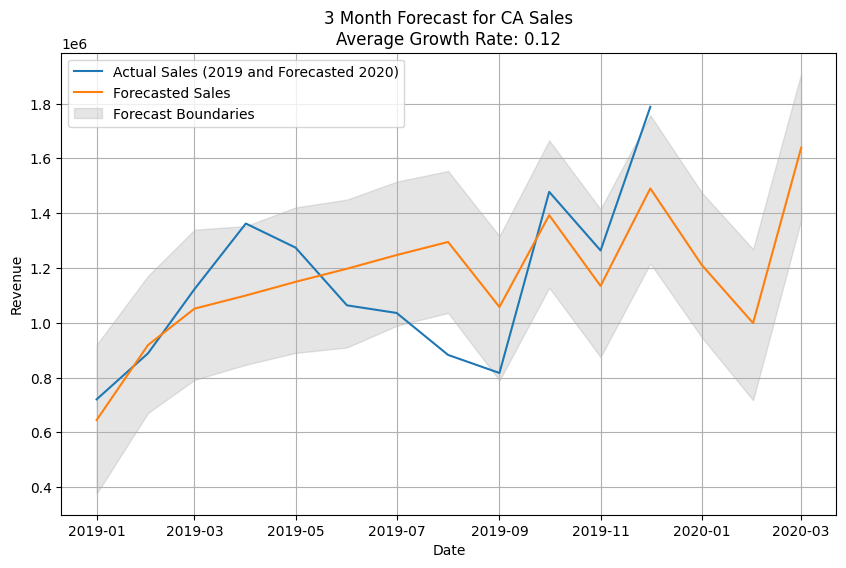

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/gojn5nex.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/k940aarz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89489', 'data', 'file=/tmp/tmpyvo7pu0k/gojn5nex.json', 'init=/tmp/tmpyvo7pu0k/k940aarz.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_model9oegu4nk/prophet_model-20230802130509.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:05:09 - cmdstanpy - INFO - Chain [1] start processing
IN

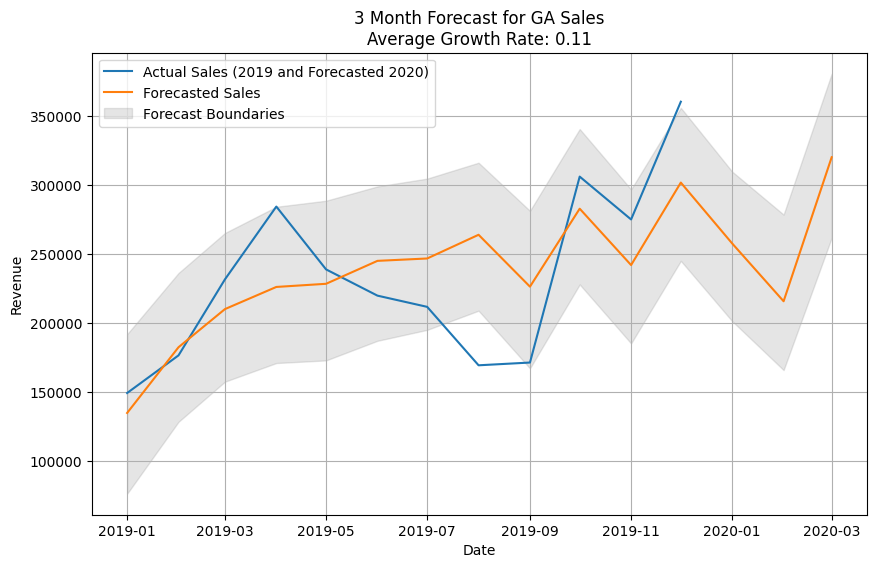

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/2h2vvhs5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/og_992qh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16972', 'data', 'file=/tmp/tmpyvo7pu0k/2h2vvhs5.json', 'init=/tmp/tmpyvo7pu0k/og_992qh.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_modele_dd9cbn/prophet_model-20230802130510.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:05:10 - cmdstanpy - INFO - Chain [1] start processing
IN

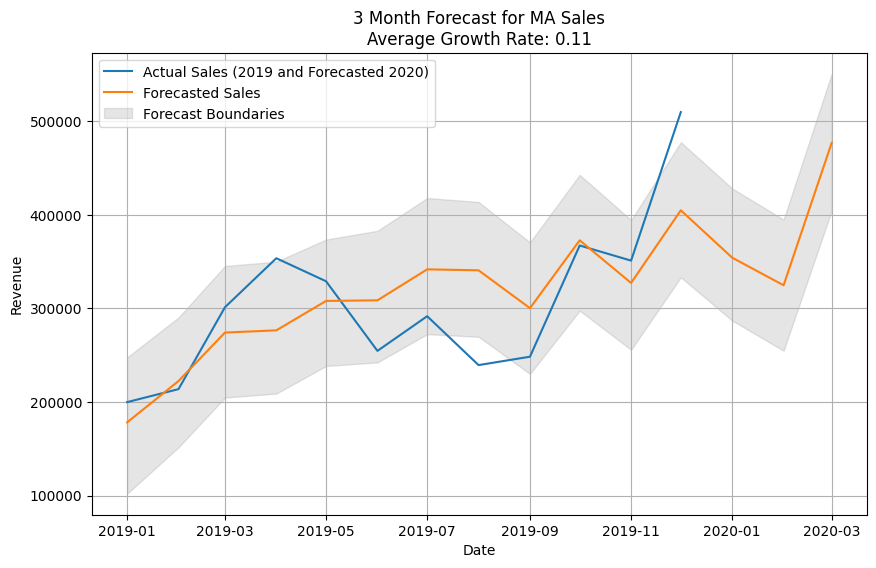

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/_wti3h2b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/74r_knu8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87451', 'data', 'file=/tmp/tmpyvo7pu0k/_wti3h2b.json', 'init=/tmp/tmpyvo7pu0k/74r_knu8.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_model7d6r7_si/prophet_model-20230802130510.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:05:10 - cmdstanpy - INFO - Chain [1] start processing
IN

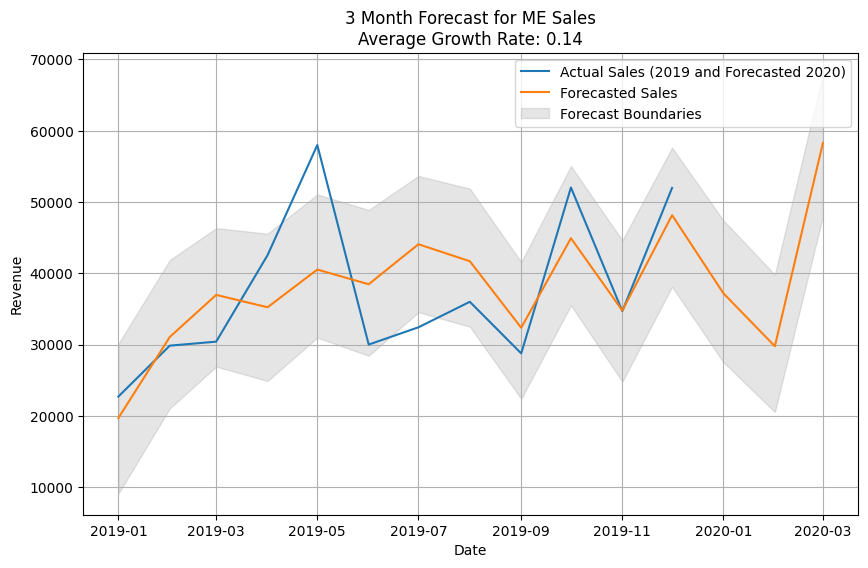

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/foeuhlmt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/epvv674e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78045', 'data', 'file=/tmp/tmpyvo7pu0k/foeuhlmt.json', 'init=/tmp/tmpyvo7pu0k/epvv674e.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_modelc6qbrhps/prophet_model-20230802130511.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:05:11 - cmdstanpy - INFO - Chain [1] start processing
IN

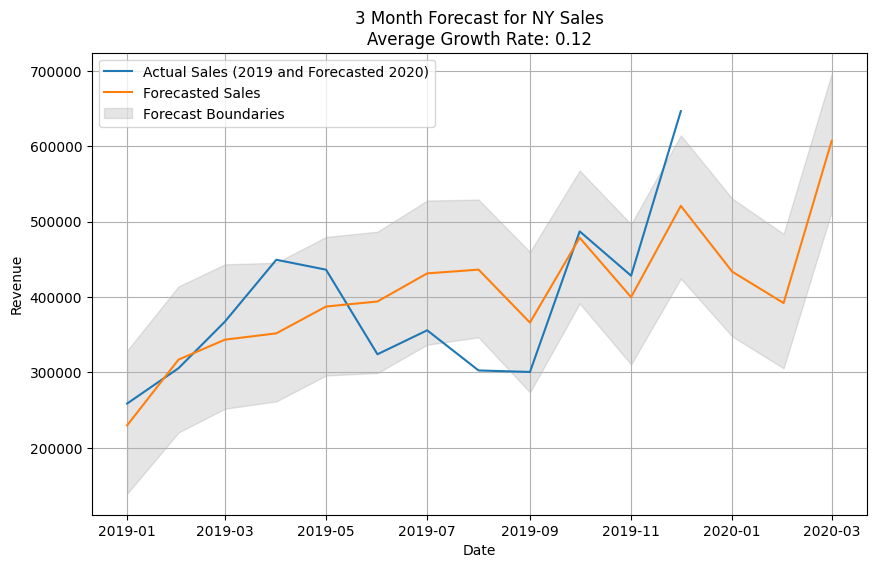

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/v7z6zg1v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/p_p9uizr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87369', 'data', 'file=/tmp/tmpyvo7pu0k/v7z6zg1v.json', 'init=/tmp/tmpyvo7pu0k/p_p9uizr.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_modelxznmw47s/prophet_model-20230802130512.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:05:12 - cmdstanpy - INFO - Chain [1] start processing
IN

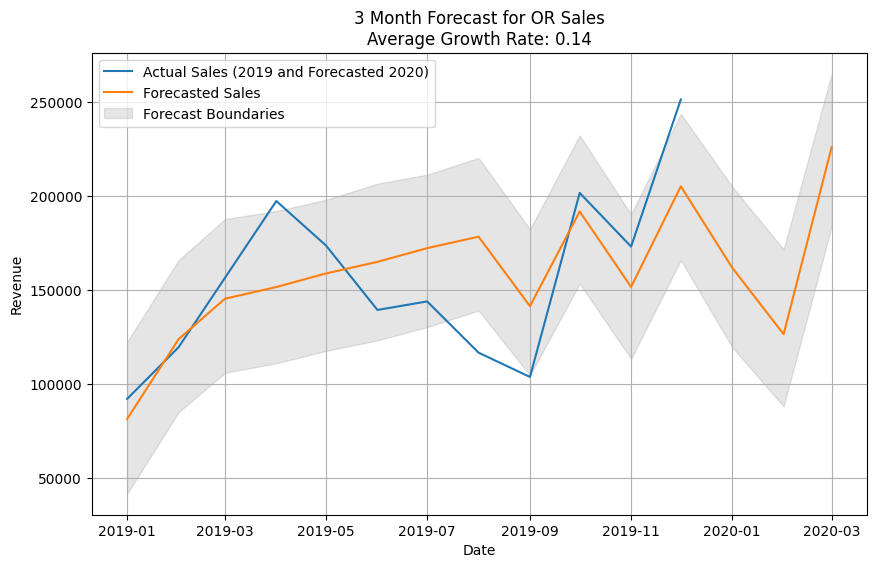

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/w9agk5zr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/foatahix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25983', 'data', 'file=/tmp/tmpyvo7pu0k/w9agk5zr.json', 'init=/tmp/tmpyvo7pu0k/foatahix.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_model9co_05yd/prophet_model-20230802130513.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:05:13 - cmdstanpy - INFO - Chain [1] start processing
IN

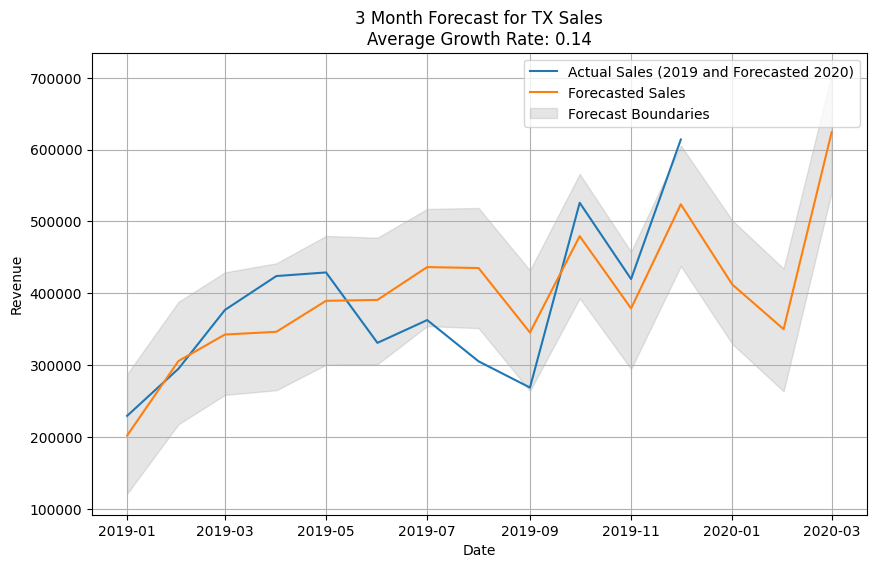

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/xxi5ly02.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvo7pu0k/cwtdwakv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67920', 'data', 'file=/tmp/tmpyvo7pu0k/xxi5ly02.json', 'init=/tmp/tmpyvo7pu0k/cwtdwakv.json', 'output', 'file=/tmp/tmpyvo7pu0k/prophet_model2qq78dlj/prophet_model-20230802130513.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:05:13 - cmdstanpy - INFO - Chain [1] start processing
IN

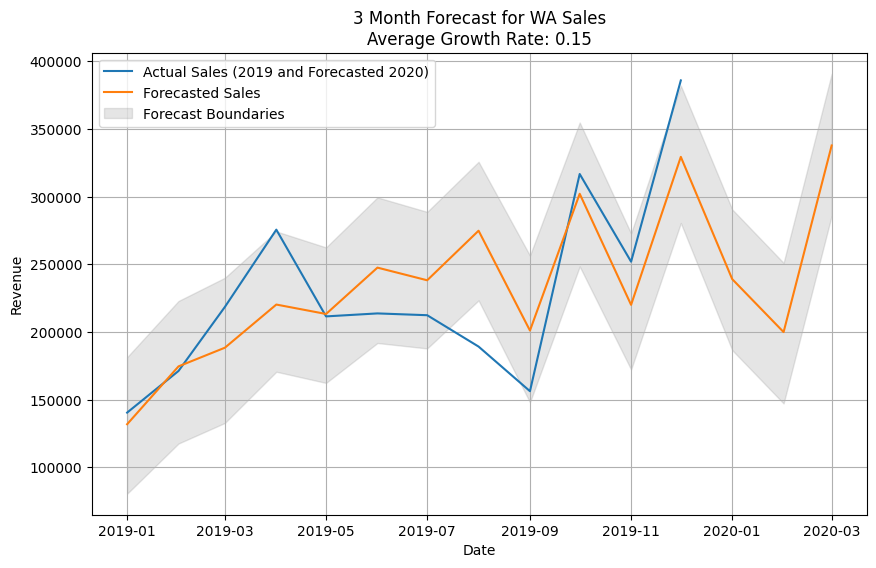

In [23]:
# Define a function to plot the forecast for each state
def plot_forecast(state):
    # Create a DataFrame containing the sales data for the specified state
    state_data = MonthlySalesByState.loc[state].reset_index()
    state_data.columns = ['ds', 'y']
    # Combine the 2019 sales data and the forecasted data for 2020 for the specified state
    state_data = pd.concat([state_data, forecast_df], ignore_index=True)

    # Drop any rows with missing (NaN) values in the 'y' column
    state_data.dropna(subset=['y'], inplace=True)
    # Convert the 'ds' column to datetime format
    state_data['ds'] = pd.to_datetime(state_data['ds'])

    # Calculate the average growth rate for each state
    state_sales_2019 = state_data[state_data['ds'].dt.year == 2019]['y']
    growth_rate = state_sales_2019.pct_change().mean()

    # Create and fit the Prophet model with seasonality
    model = Prophet(seasonality_mode='multiplicative')
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # Approximate monthly seasonality with period ~30.5 days
    model.fit(state_data)

    # Make a forecast for the next 3 months (3 months in 2020 + 12 months in 2019)
    future = model.make_future_dataframe(periods=3, freq='MS')
    forecast = model.predict(future)

    # Plot the forecasted data
    plt.figure(figsize=(10, 6))
    plt.plot(state_data['ds'], state_data['y'], label='Actual Sales (2019 and Forecasted 2020)')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2, color='gray', label='Forecast Boundaries')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.title(f'3 Month Forecast for {state} Sales\nAverage Growth Rate: {growth_rate:.2f}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function for each state to plot individual charts
for state in MonthlySalesByState.index:
    plot_forecast(state)





##### **Step 3 - optino 2 -Ploting 3 Month Forecast for each State, based on the average growth rate calculated  for each month in 2019**

# **Question 3**
### The marketing team wants to know when the best time (hour) is to display advertisements to maximize the likelihood of customers making a purchase.

In [24]:
# Calculate the total sales for each hour
hourly_sales = df.groupby('hour_only')['revenue'].sum()

# Find the hour with the highest sales
best_hour_advert = hourly_sales.idxmax()

# Get the corresponding total sales for the best hour
best_hour_sales = hourly_sales.max()

# Print the result
print(f"The best time to display advertisements is at {best_hour_advert} with total sales of ${best_hour_sales:.2f}")


The best time to display advertisements is at 19 with total sales of $2411971.14


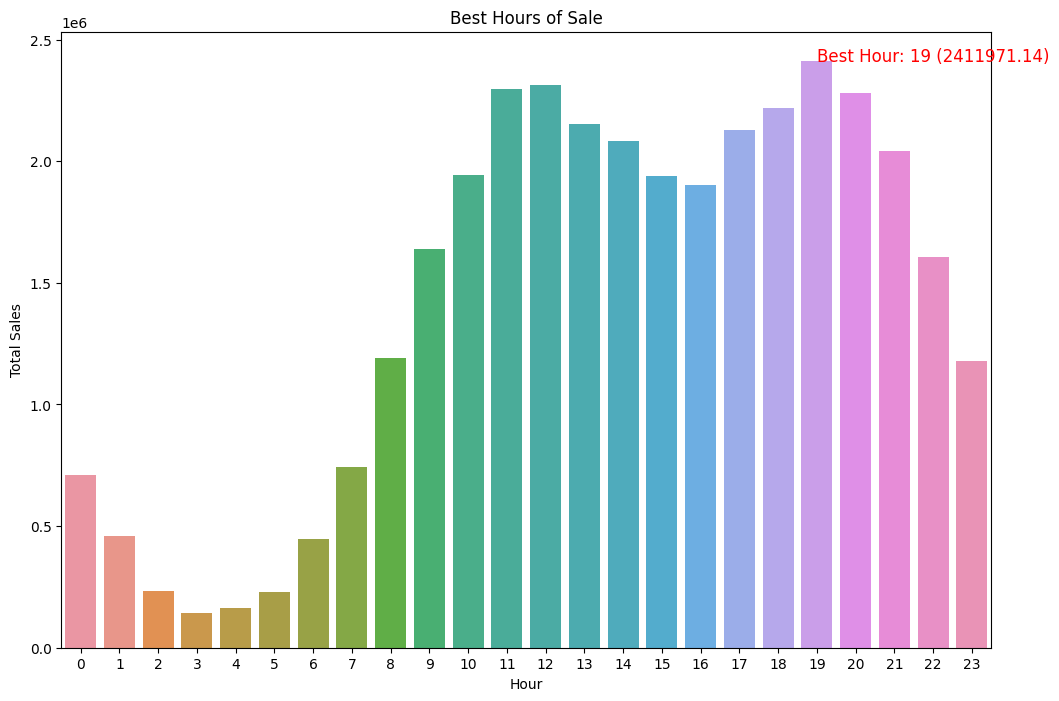

In [25]:
# Convert the Series to a DataFrame with appropriate column names and convert 'hour_only' to numeric
hourly_sales_df = pd.DataFrame({'hour_only': pd.to_numeric(hourly_sales.index), 'revenue': hourly_sales.values})

# Create a bar plot of the hourly sales
plt.figure(figsize=(12, 8))
sns.barplot(x='hour_only', y='revenue', data=hourly_sales_df)
plt.title('Best Hours of Sale')
plt.xlabel('Hour')
plt.ylabel('Total Sales')

# Add a text annotation to the bar plot
plt.annotate(f"Best Hour: {best_hour_advert} ({best_hour_sales:.2f})", (best_hour_advert, best_hour_sales), color='red', size='12')

# Show the bar plot
plt.show()

# **Downloading file csv to use table on ppt**

In [29]:
# Save some calculations to CSV
MonthlySalesByState.to_csv('best_month_sales.csv')
MonthlySalesByState.to_csv('hourly_sales.csv')
forecast_df.to_csv('forecast_data.csv')

# Download the CSV files
from google.colab import files

files.download('best_month_sales.csv')
files.download('hourly_sales.csv')
files.download('forecast_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>